# Filters & Plotting

You can read in the output of the previous LigandMPNN/ESMFold/rmsd example to use as input data.

In [1]:
import sys
sys.path.append("..") # add the path to the protflow directory (e.g. /home/username/ProtSlurm)
from protflow.poses import Poses

my_poses = Poses(poses="data/example_output/runners_example/runners_example_scores.csv", work_dir='filter_plotting_example')

We can filter our predictions so that the predictions with the worst pLDDT value for each input structure is removed. Since we created 10 sequences for each input structure, we will set n to 9. By default, this would filter the whole dataframe to 9 poses, but we want to filter the output for each input structure! Since the LigandMPNN added an index layer (_0001, _0002, etc) to the poses, we can exploit that and set 'remove_layers' to 1. The poses will be grouped by the 'poses_description' column with the specified number of index layers subtracted, then the filter will be applied to each group.

If running multiple runners, each adding index layers, it is possible to filter down to the best structures of a trajectory for each input pose  by setting remove_layers to the corresponding number of index layers.

If a prefix is provided, the filter output will be saved to the filters subfolder in the working directory specified by the poses. If plot is set to True, a violinplot of the 'score_col' before and after the filter was applied will be saved to the plots subfolder.

On a sidenote: if setting 'n' to a number smaller than 1, the dataframe will be filtered for the fraction specified.

original dataframe:


,poses_description,esm_pred_plddt
0,structure_1_0001,49.590042
1,structure_1_0002,85.398094
2,structure_1_0003,71.211914
3,structure_1_0004,50.365704
4,structure_1_0005,62.537060
5,structure_1_0006,88.350235
6,structure_1_0007,86.654144
7,structure_1_0008,41.346474
8,structure_1_0009,50.913540
9,structure_1_0010,52.444473


filtered dataframe:


/home/tripp/ProtFlow/protflow/utils/plotting.py:179: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


,poses_description,esm_pred_plddt
0,structure_1_0006,88.350235
1,structure_1_0007,86.654144
2,structure_1_0002,85.398094
3,structure_1_0003,71.211914
4,structure_1_0005,62.537060
5,structure_1_0010,52.444473
6,structure_1_0009,50.913540
7,structure_1_0004,50.365704
8,structure_1_0001,49.590042
9,structure_2_0008,89.523003


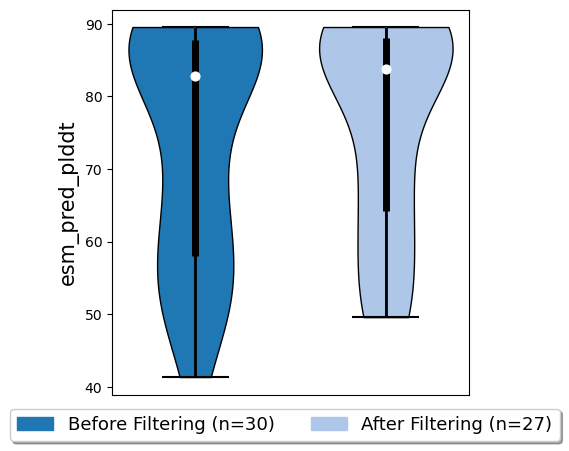

In [2]:
print('original dataframe:')
display(my_poses.df[['poses_description', 'esm_pred_plddt']])
my_poses.filter_poses_by_rank(n=9, score_col='esm_pred_plddt', remove_layers=1, ascending=False, prefix='top9_per_input', plot=True)
print('filtered dataframe:')
display(my_poses.df[['poses_description', 'esm_pred_plddt']])

To visualize our scores, we can use the ProtFlow plotting functionalities.

/home/tripp/ProtFlow/protflow/utils/plotting.py:228: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


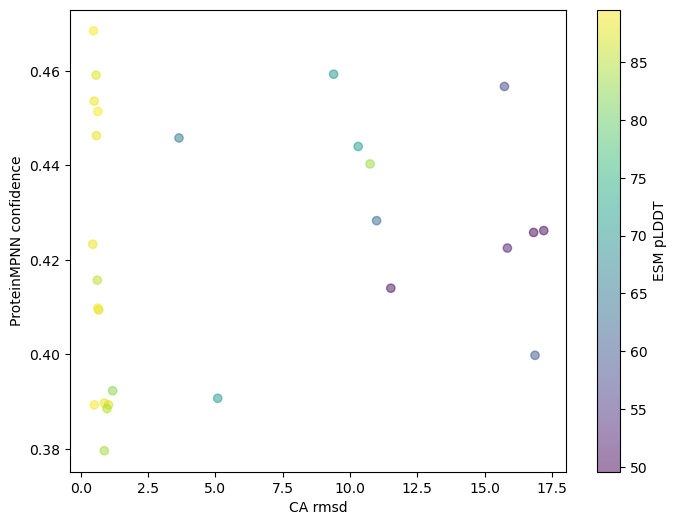

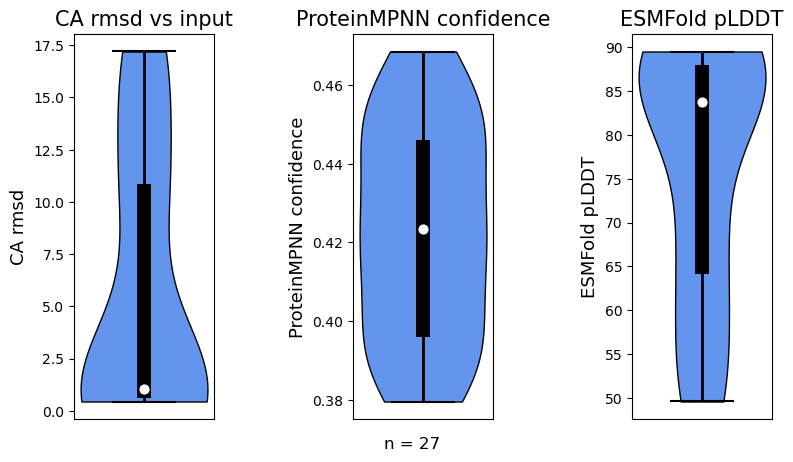

In [3]:
from protflow.utils.plotting import scatterplot, violinplot_multiple_cols

#my_poses = Poses(poses='data/example_output/metrics_plotting_example/metrics_plotting_example_scores.json', work_dir='metrics_plotting_examples')

scatterplot(dataframe=my_poses.df, x_column='CA_rmsd_rmsd', y_column='options_overall_confidence', labels=['CA rmsd', 'ProteinMPNN confidence', 'ESM pLDDT'], color_column='esm_pred_plddt', out_path='filter_plotting_example/plots/scatterplot.png')
violinplot_multiple_cols(dataframe=my_poses.df, cols=['CA_rmsd_rmsd', 'options_overall_confidence', 'esm_pred_plddt'], titles=['CA rmsd vs input', 'ProteinMPNN confidence', 'ESMFold pLDDT'], y_labels=['CA rmsd', 'ProteinMPNN confidence', 'ESMFold pLDDT'], out_path='filter_plotting_example/plots/violinplot.png')

We can also create sequence logos of the sequences that were generated for each input backbone. sequence_logo accepts a dataframe column containing sequences or paths to fasta files as input. The logos will be saved in EPS format and can be viewed using document viewers.

In [4]:
from protflow.utils.plotting import sequence_logo
import os

for input_pdb, df in my_poses.df.groupby('input_poses'):
    sequence_logo(dataframe=df, input_col='options_sequence', out_path=f'filter_plotting_example/plots/sequence_logo_{os.path.basename(input_pdb)}.logo')